In [59]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import plotly.graph_objects as go
from webcolors import hex_to_rgb
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Common Crawl History

In [220]:
important_langs = ["eng", "zho"] + ["ind", "lao", "tha", "tgl", "khm", "mya"]
color_palette = ["#000000", "#777777"] + ["#cd001a", "#79c300", "#61007d", "#f2cd00", "#1961ae", "#ef6a00"]

In [63]:
cc_df = pd.read_csv("./utils/cc-history.csv")
cc_df = cc_df.groupby(['crawl', 'year', 'is SEA?', 'primary_language']).sum(['pages', 'urls', '%pages/crawl']).reset_index()
cc_df = cc_df[cc_df.primary_language.isin(important_langs)]
cc_df['pages_cumsum'] = cc_df.groupby(['is SEA?', 'primary_language'])['pages'].transform(pd.Series.cumsum)
cc_df.tail()

crawl  year  is SEA? primary_language     pages      urls  \
856  CC-MAIN-2024-18  2024     True              khm    307653    306688   
857  CC-MAIN-2024-18  2024     True              lao    106510    105805   
858  CC-MAIN-2024-18  2024     True              mya    349744    349015   
860  CC-MAIN-2024-18  2024     True              tgl    246536    245803   
861  CC-MAIN-2024-18  2024     True              tha  11551587  11498877   

     %pages/crawl  pages_cumsum  
856        0.0110      12310724  
857        0.0038       4573491  
858        0.0126      15175280  
860        0.0088       9606890  
861        0.4145     499211775

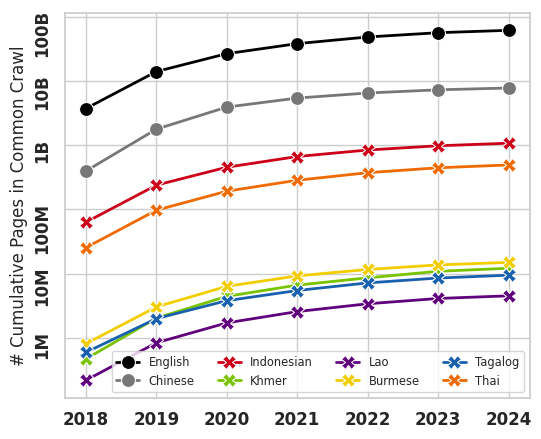

In [251]:
sns.set(rc={'figure.figsize':(6,5)})
sns.set(font_scale=1)
sns.set_style('whitegrid')

cc_plot = sns.lineplot(
    data=cc_df, x="year", y="pages_cumsum",
    hue="primary_language", style="is SEA?",
    palette=color_palette, linewidth=2, markersize=10,
    markers=True, errorbar=None, dashes=False)
cc_plot.set(yscale='log')

cc_plot.tick_params(axis='y', rotation=90)
# Set bold ticks
cc_plot.tick_params(axis='both', which='major', labelsize=10, width=2)
for tick in cc_plot.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(12)
for tick in cc_plot.get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(12)


cc_plot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x / 1000_000_000)) + "B" if x / 1000_000_000 >= 1 else str(int(x / 1000_000)) + "M"))
cc_plot.set_ylabel("# Cumulative Pages in Common Crawl")
cc_plot.set_xlabel("")
plt.legend(
    title='', loc='lower right', ncols=4, fontsize="x-small",
    labels=['English', 'Chinese', 'Indonesian', 'Khmer', 'Lao', 'Burmese', 'Tagalog', 'Thai']
)

plt.savefig('../figures/cc_history.pdf', bbox_inches='tight')

# SEACrowd Resources

In [2]:
df = pd.read_csv("./utils/region_lang_datasets.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.loc[~(df['# Datasets'] == 0)]

df.tail()

Region ISO code Language name  # Datasets
1388  Vietnam      tas       Tay Boi           1
1393  Vietnam      tdr        Todrah           1
1397  Vietnam      vie    Vietnamese         137
1398  Vietnam      cja  Western Cham           1
1399  Vietnam      lwh   White Lachi           1

### Region-Lang Treemap Chart

Pool all languages that have `# Datasets == 1` to "Others" per region.

In [248]:
others_cutoff_point = 3
pdf = df[df["# Datasets"] > others_cutoff_point].copy()

others_df = df[df["# Datasets"] <= others_cutoff_point]
others_df = others_df.groupby(["Region"]).sum(["# Datasets"]).reset_index()
if "ISO code" not in others_df.columns:
    others_df["ISO code"] = ["others" for i in range(len(others_df))]
if "Language name" not in others_df.columns:
    others_df["Language name"] = ["Others" for i in range(len(others_df))]

pdf = pd.concat([pdf, others_df]).reset_index()
pdf = pdf.loc[:, ~pdf.columns.str.contains('^index')]
pdf.tail(20)

Region ISO code  Language name  # Datasets
153         Vietnam      cmo  Central Mnong           6
154         Vietnam      bru    Eastern Bru           4
155         Vietnam      hni           Hani           4
156         Vietnam      hnj     Hmong Njua           5
157         Vietnam      jra          Jarai           7
158         Vietnam      khm          Khmer          50
159         Vietnam      blt        Tai Dam           4
160         Vietnam      vie     Vietnamese         137
161          Brunei   others         Others           9
162        Cambodia   others         Others          12
163      East Timor   others         Others          13
164       Indonesia   others         Others         636
165            Laos   others         Others          50
166        Malaysia   others         Others          85
167         Myanmar   others         Others          81
168  Non-indigenous   others         Others           2
169     Philippines   others         Others         145
170       Singapore   others         Others           1
171        Thailand   others         Others          52
172         Vietnam   others         Others          70

In [249]:
pdf['# Datasets'].describe()

count    173.000000
mean      19.023121
std       55.713757
min        1.000000
25%        4.000000
50%        5.000000
75%       10.000000
max      636.000000
Name: # Datasets, dtype: float64

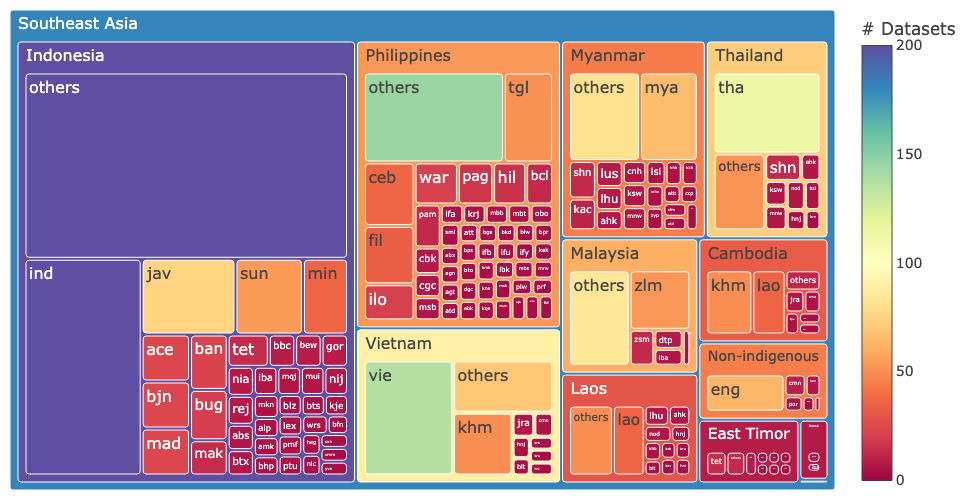

In [250]:
fig = px.treemap(pdf, path=[px.Constant("Southeast Asia"), 'Region', 'ISO code'], values='# Datasets',
                  color='# Datasets', range_color=[0, 200],
                  color_continuous_scale='Spectral', color_continuous_midpoint=100)
fig.update_traces(root_color="#ffffff", textfont=dict(size=16), marker=dict(cornerradius=3))
fig.update_layout(
    template='none',
    width=1000,
    height=500,
    margin=dict(l=10, r=10, t=10, b=10),
    font_size = 14,
    # uniformtext=dict(minsize=8, mode='show'),
    showlegend = True,
)
fig.show()

## All Datasets

In [346]:
all_dset_df = pd.read_csv('./utils/all_datasets.csv')
all_dset_df.tail()

No              Dataset name    Exists in Subset List?  \
465  466                     XQuAD                     XQuAD   
466  467                   XQuAD-R                     NO!!!   
467  468                      xSID                      xSID   
468  469               XStoryCloze               XStoryCloze   
469  470  Yunshan-Cup-2020 Lao POS  Yunshan-Cup-2020 Lao POS   

               Subset(s)  Unnamed: 4  \
465   xquad.th\nxquad.vi         NaN   
466                  NaN         NaN   
467  English\nIndonesian         NaN   
468               id\nmy         NaN   
469                  lao         NaN   

                                   Dataset description  \
465  XQuAD (Cross-lingual Question Answering Datase...   
466  XQuAD-R is a retrieval version of the XQuAD da...   
467  We introduce XSID, a new benchmark for cross-l...   
468  XStoryCloze consists of the professionally tra...   
469  Lao POS dataset containing 11,000 sentences wa...   

                                           Dataset URL  \
465           https://github.com/google-deepmind/xquad   
466  https://github.com/google-research-datasets/la...   
467  https://bitbucket.org/robvanderg/xsid/src/master/   
468  https://huggingface.co/datasets/juletxara/xsto...   
469         https://github.com/GKLMIP/Yunshan-Cup-2020   

                                       HuggingFace URL Dataset language(s)  \
465              https://huggingface.co/datasets/xquad          tha\r\nvie   
466                                                NaN          tha\r\nvie   
467                                                NaN            ind\neng   
468  https://huggingface.co/datasets/juletxara/xsto...          ind\r\nmya   
469                                                NaN                 lao   

    Dataset collection region  ...  \
465                       NaN  ...   
466                       NaN  ...   
467                       NaN  ...   
468                       NaN  ...   
469                      Laos  ...   

                                            Edit Link      Submission Date  \
465  https://www.jotform.com/edit/5741921855254967213  2023-10-27 13:03:05   
466  https://www.jotform.com/edit/5877329672004338040  2024-04-01 06:22:47   
467                                               NaN                  NaN   
468  https://www.jotform.com/edit/5758787725592903029  2023-11-16 01:32:52   
469  https://www.jotform.com/edit/5758634875409132496  2023-11-15 21:18:07   

        Last Update Date Unnamed: 50       Approval Status  \
465  2023-10-29 19:20:57         NaN              Approved   
466  2024-04-01 15:29:57         NaN              Approved   
467                  NaN         NaN  NusaCrowd carry-over   
468  2023-11-19 13:19:25         NaN              Approved   
469  2023-11-19 13:54:59         NaN              Approved   

                         Reviewer  \
465  samuel.cahyawijaya@gmail.com   
466   rahmad.mahendra@cs.ui.ac.id   
467                           NaN   
468  samuel.cahyawijaya@gmail.com   
469          holy@aisingapore.org   

                                                 Notes  Obtained points  \
465                                                NaN              2.0   
466  update from original submission:\ndataset anno...              2.0   
467                        Cannot find the speech data              NaN   
468                                    +1 from Burmese              3.0   
469                                                NaN              3.0   

      Dataloader name                                   GitHub Issue URL  
465             xquad  https://github.com/SEACrowd/seacrowd-datahub/i...  
466            xquadr  https://github.com/SEACrowd/seacrowd-datahub/i...  
467              xsid                                                NaN  
468       xstorycloze  https://github.com/SEACrowd/seacrowd-datahub/i...  
469  yunshan_cup_2020  https://github.com/SEACrowd/seacrowd-datahub/i...  

[5 rows x 57 colu

In [347]:
def get_index_from_pair(element_1, element_2, list_1, list_2):
    for i, (x, y) in enumerate(zip(list_1, list_2)):
        if x == element_1 and y == element_2:
            return i
    return -1

In [348]:
task_df = pd.read_csv("./utils/task-details.csv")
task_df.head()

task          display_name       schema modality
0  Abstract Meaning Representation  Abstract Mean. Repr.         NONE     Text
1        Abstractive Summarization        Abs. Summariz.          T2T     Text
2       Abusive Language Detection    Abusive Lang. Det.         TEXT     Text
3  Aspect Based Sentiment Analysis                  ABSA   TEXT_MULTI     Text
4          Automatic Essay Scoring         Essay Scoring  PAIRS_SCORE     Text

### Region-Task Treemap Chart

In [6]:
region_tasks_df = {'region': [], 'task': [], 'n_dataset': []}

for i in range(len(all_dset_df)):
    langs = all_dset_df['Dataset language(s)'][i].split("\n")
    langs = [lang.strip() for lang in langs]
    tasks = all_dset_df['Dataset task(s)'][i].split("\n")

    regions = list(set(df[(df['ISO code'].isin(langs))]['Region'].tolist()))
    tasks = [task_df[task_df['task'] == task.strip()]['display_name'].tolist()[0] for task in tasks]
    tasks = list(set(tasks))
    
    for region in regions:
        for task in tasks:
            task = task.strip()
            index = get_index_from_pair(region, task, region_tasks_df['region'], region_tasks_df['task'])
            if index != -1:
                region_tasks_df['n_dataset'][index] += 1
            else:
                region_tasks_df['task'].append(task)
                region_tasks_df['n_dataset'].append(1)
                region_tasks_df['region'].append(region)

region_tasks_df = pd.DataFrame.from_dict(region_tasks_df)
# region_tasks_df = region_tasks_df.replace(r'\s+', '\n', regex=True)
region_tasks_df.tail(10)

region                task  n_dataset
354        Thailand  Text-to-image Gen.          1
355        Malaysia  Text-to-image Gen.          1
356         Myanmar  Text-to-image Gen.          1
357         Vietnam  Text-to-image Gen.          1
358       Indonesia         Fact Check.          1
359        Thailand         Commonsense          1
360        Thailand                 NLI          1
361       Indonesia                 SLU          1
362  Non-indigenous                 SLU          1
363         Myanmar         Commonsense          1

In [7]:
others_cutoff_point = 3
pdf = region_tasks_df[region_tasks_df["n_dataset"] > others_cutoff_point]

others_df = region_tasks_df[region_tasks_df["n_dataset"] <= others_cutoff_point]
others_df = others_df.groupby(["region"]).sum(["n_dataset"]).reset_index()
if "task" not in others_df.columns:
    others_df["task"] = ["Others" for i in range(len(others_df))]

pdf = pd.concat([pdf, others_df]).reset_index()
pdf = pdf.loc[:, ~pdf.columns.str.contains('^index')]
pdf.head(10)

region          task  n_dataset
0    Indonesia            QA         14
1     Thailand           ASR         11
2     Thailand           OCR          5
3      Vietnam           ASR         13
4    Indonesia           ASR         28
5  Philippines           ASR          6
6    Indonesia  Lang. Model.         32
7    Indonesia           WSD          5
8     Thailand            MT         19
9         Laos            MT          9

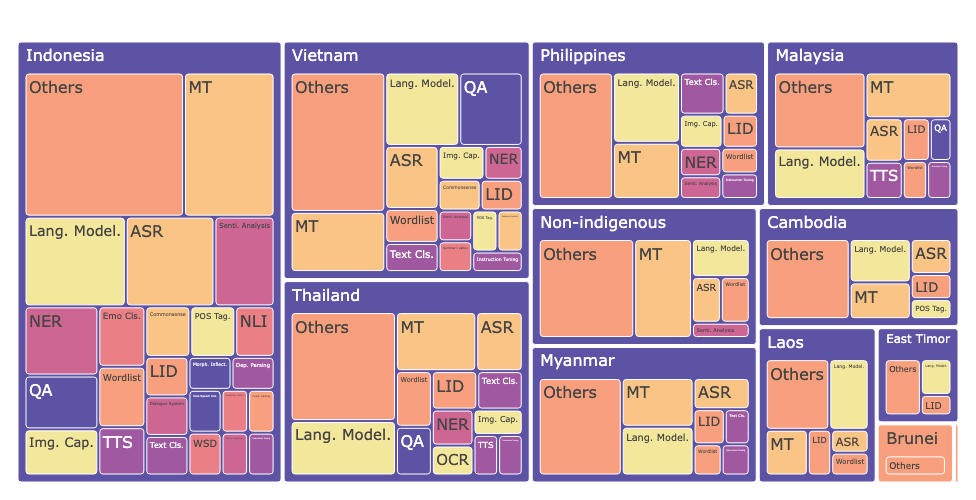

In [8]:
fig = px.treemap(pdf, path=['region', 'task'], values='n_dataset',
                  color='task', labels='task',
                  # range_color=[0, 40],
                  # color_continuous_scale='Viridis',
                  color_discrete_sequence=px.colors.sequential.Sunset[:],
                  # color_discrete_sequence=px.colors.sequential.Viridis[1:],
                )

fig.update_traces(root_color="#ffffff", textfont=dict(size=16), marker=dict(cornerradius=3))
fig.update_layout(
    template='none',
    width=1000,
    height=500,
    margin=dict(l=10, r=10, t=10, b=10),
    # uniformtext=dict(minsize=8, mode='show'),
    showlegend = True,
)
fig.show()

### Task-Schema-Modality-Region Sankey Diagram

In [349]:
metadata_df = {'region': [], 'task': [], 'n_dataset': []}

for i in range(len(all_dset_df)):
    langs = all_dset_df['Dataset language(s)'][i].split("\n")
    langs = [lang.strip() for lang in langs]
    tasks = all_dset_df['Dataset task(s)'][i].split("\n")

    regions = list(set(df[(df['ISO code'].isin(langs))]['Region'].tolist()))
    tasks = list(set([task_df[task_df['task'] == task.strip()]['display_name'].tolist()[0] for task in tasks]))
    
    for region in regions:
        for task in tasks:
            task = task.strip()
            index = get_index_from_pair(region, task, metadata_df['region'], metadata_df['task'])
            if index != -1:
                metadata_df['n_dataset'][index] += 1
            else:
                metadata_df['task'].append(task)
                metadata_df['n_dataset'].append(1)
                metadata_df['region'].append(region)

metadata_df = pd.DataFrame.from_dict(metadata_df)
metadata_df['schema'] = metadata_df['task'].apply(lambda x: task_df[task_df['display_name'] == x]['schema'].tolist()[0])
metadata_df['modality'] = metadata_df['task'].apply(lambda x: task_df[task_df['display_name'] == x]['modality'].tolist()[0])
metadata_df['modality'] = pd.Categorical(metadata_df['modality'], ["Speech", "VL", "Text"])
metadata_df = metadata_df.sort_values(['modality', 'schema', 'task', 'region']).reset_index()
metadata_df.tail(10)

index          region            task  n_dataset      schema modality
354    213       Indonesia      Topic Cls.          2        TEXT     Text
355    331  Non-indigenous      Topic Cls.          1        TEXT     Text
356    163         Vietnam      Topic Cls.          3        TEXT     Text
357    214       Indonesia  Topic Modeling          3        TEXT     Text
358    110       Indonesia            ABSA          3  TEXT_MULTI     Text
359    353        Thailand            ABSA          1  TEXT_MULTI     Text
360    334         Vietnam            ABSA          2  TEXT_MULTI     Text
361    113       Indonesia  Const. Parsing          4        TREE     Text
362      8         Myanmar  Const. Parsing          1        TREE     Text
363    273        Thailand  Const. Parsing          1        TREE     Text

In [351]:
others_cutoff_point = 3

n_datasets_per_task_df = metadata_df.groupby(['task']).sum(['n_dataset']).reset_index()

tasks_for_others = []
for i in range(len(n_datasets_per_task_df)):
    if n_datasets_per_task_df['n_dataset'][i] <= 3:
        tasks_for_others.append(n_datasets_per_task_df['task'][i])

metadata_df['task'] = metadata_df['task'].apply(lambda x: x if x not in tasks_for_others else "Others")

In [352]:
SCHEMA_COLOR_NODES = {
    # VL
    "IMTEXT": px.colors.sequential.YlGnBu[4].replace("rgb", "rgba").replace(")", ",1.0)"),
    "IMQA": px.colors.sequential.YlGnBu[6].replace("rgb", "rgba").replace(")", ",1.0)"),
    "VIDTEXT": px.colors.sequential.YlGnBu[7].replace("rgb", "rgba").replace(")", ",1.0)"),
    # Speech
    "SPTEXT": px.colors.sequential.Aggrnyl[3].replace("rgb", "rgba").replace(")", ",1.0)"),
    "SPEECH": px.colors.sequential.Aggrnyl[4].replace("rgb", "rgba").replace(")", ",1.0)"),
    "S2S": px.colors.sequential.Aggrnyl[5].replace("rgb", "rgba").replace(")", ",1.0)"),
    # NONE
    "NONE": "rgba(125, 125, 125,1.0)",
}

for i, text_schema in enumerate(
    ["SSP", "T2T", "TEXT", "TEXT_MULTI", "PAIRS", "PAIRS_MULTI", "PAIRS_SCORE", "QA", "SEQ_LABEL", "KB", "TREE"]):
    # rgb_color = hex_to_rgb(px.colors.sequential.deep[i])
    # SCHEMA_COLOR_NODES[text_schema] = f'rgba({rgb_color[0]}, {rgb_color[1]}, {rgb_color[2]}, 1.0)'
    SCHEMA_COLOR_NODES[text_schema] = (px.colors.sequential.Sunset + px.colors.sequential.Pinkyl_r)[i].replace("rgb", "rgba").replace(")", ",1.0)")

MODALITY_COLOR_NODES = {
    "VL": px.colors.sequential.YlGnBu[4].replace("rgb", "rgba").replace(")", ",1.0)"),
    "Text": px.colors.sequential.Sunset[1].replace("rgb", "rgba").replace(")", ",1.0)"),
    "Speech": px.colors.sequential.Aggrnyl[4].replace("rgb", "rgba").replace(")", ",1.0)"),
}

REGION_COLOR_NODES = {
    'Indonesia': '',
    'Thailand': '',
    'Vietnam': '',
    'Cambodia': '',
    'Laos': '',
    'Malaysia': '',
    'Myanmar': '',
    'Philippines': '',
    'Brunei': '',
    'East Timor': '',
    'Singapore': '',
}

for i, key in enumerate(REGION_COLOR_NODES.keys()):
    REGION_COLOR_NODES[key] = (px.colors.sequential.gray + px.colors.sequential.Purpor)[i].replace("rgb", "rgba").replace(")", ",1.0)")

REGION_COLOR_NODES["Non-indigenous"] = "rgba(125, 125, 125, 1.0)"

In [353]:
unique_tasks = metadata_df['task'].unique().tolist()
unique_schemas = metadata_df['schema'].unique().tolist()
unique_modalities = metadata_df['modality'].unique().tolist()
unique_regions = metadata_df['region'].unique().tolist()

node_label = unique_tasks + unique_schemas + unique_modalities + unique_regions
node_dict = {y: x for x, y in enumerate(node_label)}

source, target, values = [], [], []

# Task-Schema
for task in unique_tasks:
    for schema in metadata_df[metadata_df['task'] == task]['schema'].unique().tolist():
        # print(task, schema)
        source.append(task)
        target.append(schema)
        values.append(metadata_df[(metadata_df['task'] == task) & (metadata_df['schema'] == schema)]['n_dataset'].sum())
print("Task-Schema", len(source), len(target), len(values))

# Schema-Modality
for schema in unique_schemas:
    for modality in metadata_df[metadata_df['schema'] == schema]['modality'].unique().tolist():
        source.append(schema)
        target.append(modality)
        values.append(metadata_df[(metadata_df['schema'] == schema) & (metadata_df['modality'] == modality)]['n_dataset'].sum())
print("Schema-Modality", len(source), len(target), len(values))

# Modality-Region
for modality in unique_modalities:
    for region in metadata_df[metadata_df['modality'] == modality]['region'].unique().tolist():
        source.append(modality)
        target.append(region)
        values.append(metadata_df[(metadata_df['modality'] == modality) & (metadata_df['region'] == region)]['n_dataset'].sum())
print("Modality-Region", len(source), len(target), len(values))

source_node = [node_dict[x] for x in source if x in node_dict]
target_node = [node_dict[x] for x in target if x in node_dict]

# COLORING
SCHEMA_COLOR_LINKS = {k: v.replace("1.0", "0.5") for k, v in SCHEMA_COLOR_NODES.items()}
REGION_COLOR_LINKS = {k: v.replace("1.0", "0.5") for k, v in REGION_COLOR_NODES.items() if k in unique_regions}

color_node = []    
for i in range(len(node_label)):
    if node_label[i] in unique_schemas:
        color_node.append(SCHEMA_COLOR_NODES[node_label[i]])
    elif node_label[i] in unique_tasks:
        schema = metadata_df[metadata_df['task'] == node_label[i]]['schema'].tolist()[0]
        color_node.append(SCHEMA_COLOR_NODES[schema])
    elif node_label[i] in unique_modalities:
        color_node.append(MODALITY_COLOR_NODES[node_label[i]])
    else:
        color_node.append(REGION_COLOR_NODES[node_label[i]])


color_link = []
for i, (s, t, v) in enumerate(zip(source, target, values)):
    if t in SCHEMA_COLOR_LINKS:
        color_link.append(SCHEMA_COLOR_LINKS[t])
    elif s in SCHEMA_COLOR_LINKS:
        color_link.append(SCHEMA_COLOR_LINKS[s])
    elif t in REGION_COLOR_LINKS:
        color_link.append(REGION_COLOR_LINKS[t])
    else:
        color_link.append("lightgrey")

Task-Schema 57 57 57
Schema-Modality 77 77 77
Modality-Region 109 109 109


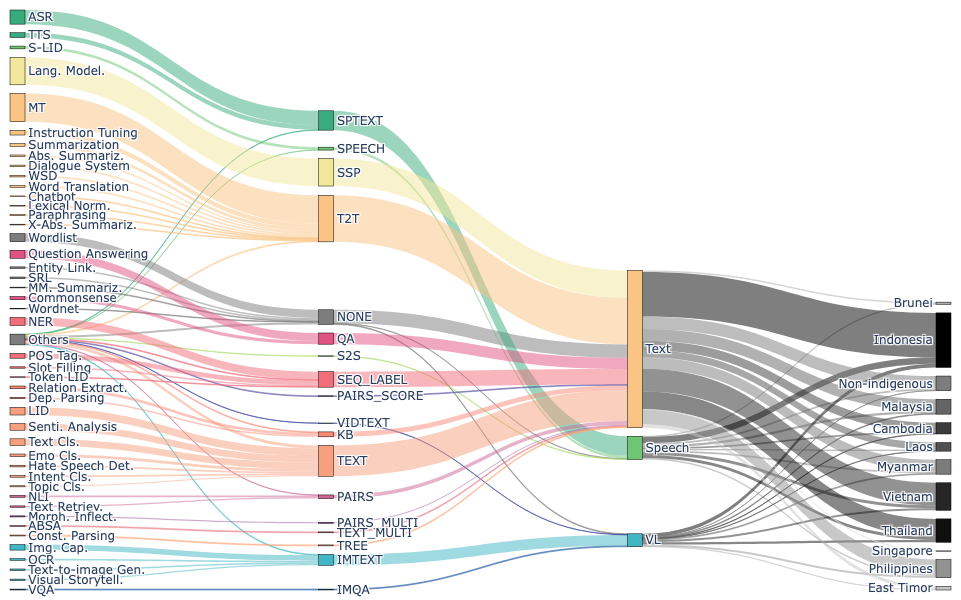

In [363]:
fig = go.Figure(
    data=[go.Sankey(
        node = dict(
            pad = 20,
            thickness = 15,
            line = dict(color = "black", width = 0.5),
            label = node_label,
            color = color_node,
        ),
        link = dict(
            source = source_node,
            target = target_node,
            value = values,
            color = color_link,
        ),
        orientation = "h",
    )],
    layout = go.Layout(
        autosize=True,
        width=900,
        height=600,
        margin=dict(l=10, r=10, t=10, b=10),
        font_size = 12,
    ),
)


fig.write_image('../figures/data_in_seacrowd.pdf')
fig.show()

In [192]:
metadata_df[(metadata_df['schema'] == 'SPTEXT') & (metadata_df['modality'] == 'Speech')].groupby(['task']).sum(['n_dataset'])

index  n_dataset
task                        
ASR           488         92
S2T Trans.    259          3
TTS           715         31

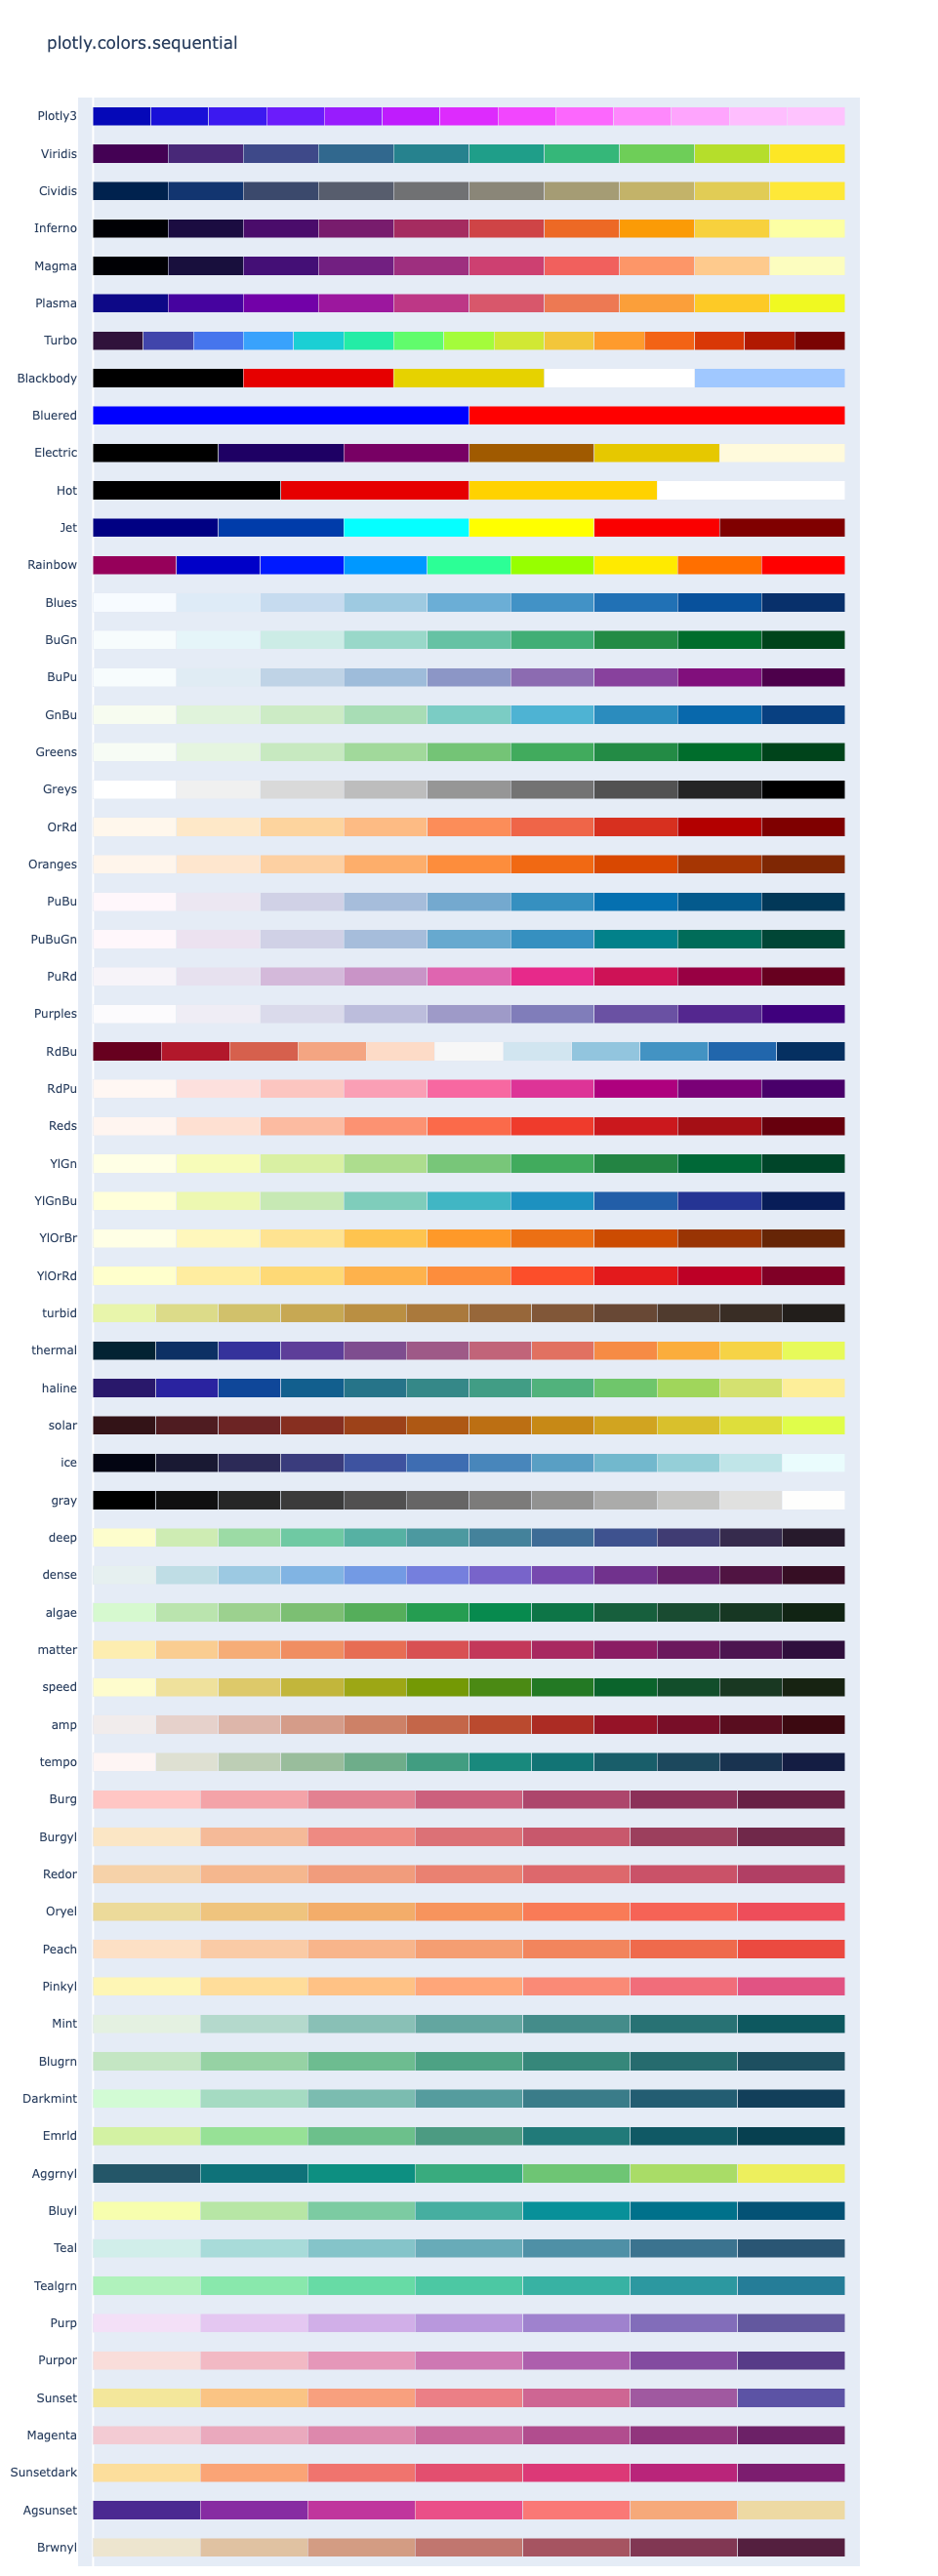

In [218]:
px.colors.sequential.swatches()

In [132]:
for s, t, v in zip(source, target, values):
    # if s == "SPTEXT" or t == "SPTEXT":
    print(s, t, v)

SLU Others 3
S2S Trans. S2S 3
S-LID SPEECH 18
SER SPEECH 1
ASR SPTEXT 92
S2T Trans. SPTEXT 3
TTS SPTEXT 31
Coref. Res. KB 3
Dep. Parsing KB 9
Knowledge Base KB 2
Relation Extract. KB 18
Abstract Mean. Repr. Others 1
Entity Link. Others 10
Fact Check. Others 3
Goal-orient. Gen. Others 3
Question Generation Others 1
SRL Others 10
Text-to-SQL Others 2
Wordlist Others 53
Wordnet Others 4
NLI PAIRS 12
Next Tweet Pred. PAIRS 1
Stance Det. PAIRS 2
Text Retriev. PAIRS 9
Morph. Inflect. PAIRS_MULTI 7
Answer Grading PAIRS_SCORE 1
Essay Scoring PAIRS_SCORE 1
Sem. Text Sim. PAIRS_SCORE 3
Commonsense QA 21
Question Answering QA 52
Keyword Extract. SEQ_LABEL 2
NER SEQ_LABEL 52
POS Tag. SEQ_LABEL 31
Slot Filling SEQ_LABEL 9
Statement Tag. SEQ_LABEL 2
Token LID SEQ_LABEL 4
Tweet Order. SEQ_LABEL 1
Lang. Model. SSP 178
Abs. Summariz. T2T 10
Chatbot T2T 5
Dialogue System T2T 10
Error Correct. T2T 2
Instruction Tuning T2T 31
Lexical Norm. T2T 5
MT T2T 184
Paraphrasing T2T 6
Poem Gen. T2T 1
Style Transfer